# C10P528 Applied Machine Learning Coursework

In [ ]:
# !pip install plotly
# !pip install cufflinks

In [3]:
# pip install mlxtend

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from mlxtend.plotting import plot_confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score

In [5]:
#Reading in the dataset
data = pd.read_csv('diabetes_data_upload.csv')
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Exploratory Analysis

In [6]:
#Checking the datatypes of variables and null values
data.info()
#we see that age is the only non obkect atttribute
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

The target variable is the diagnosis located in the "class" column, it has a binary value Positive or Negative.

### Age factor Analysis

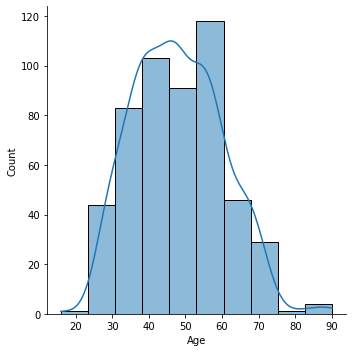

In [7]:
sns.displot(x='Age', kind ='hist', data= data, bins = 10, kde = True);

In [8]:
# descriptive statistics of the Age column
data.Age.describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

## Data Pre-processing

### Encoding Categorical attributes

In [16]:
#we encode the categorical variables to 0 and 1
from sklearn import preprocessing
data1=data.copy()

data=data1.copy()
enc = preprocessing.LabelEncoder()
for i in data.columns[1:] :
    data[i] = enc.fit_transform(data[i])
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


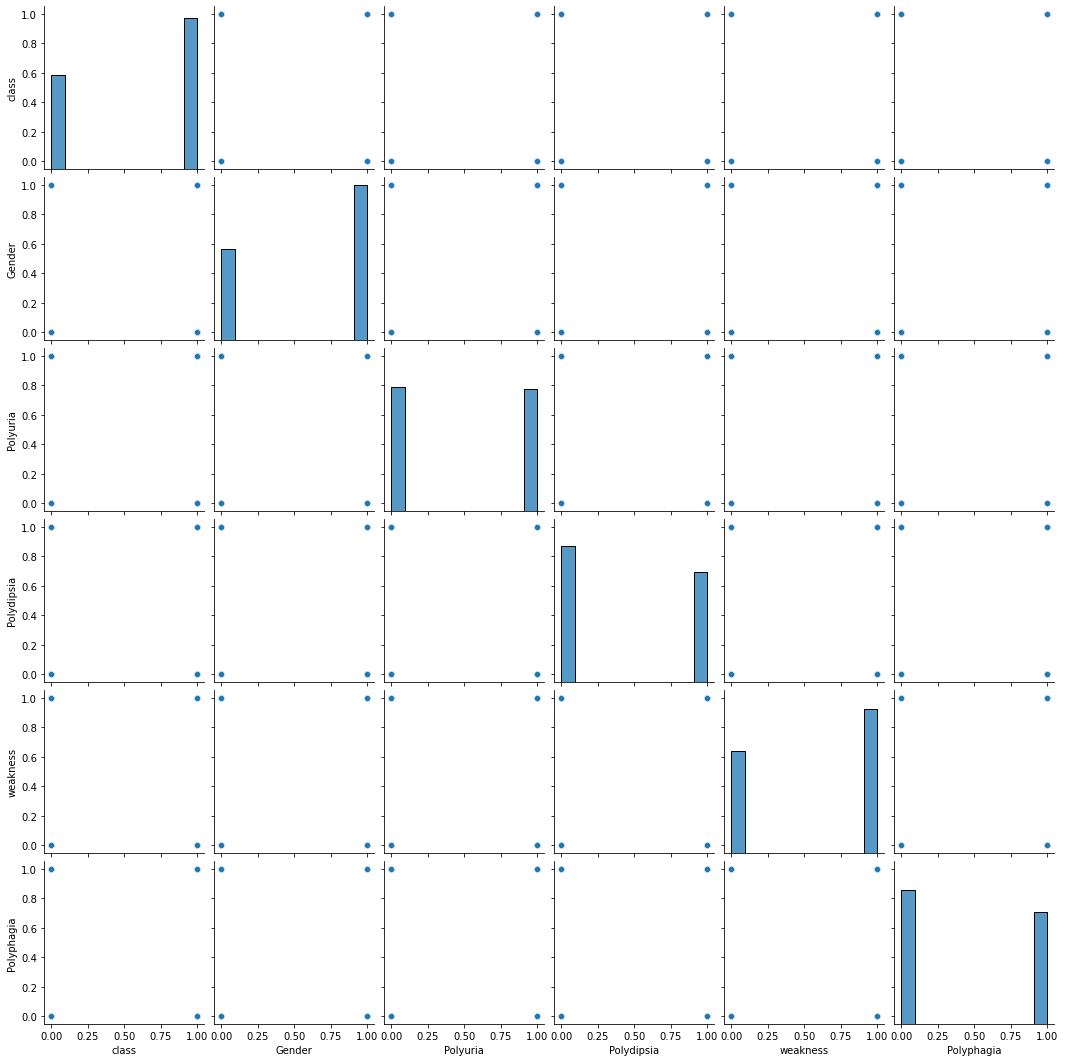

In [20]:
#exploring attribute and target variable relationship
sns.pairplot(data, vars = ["class","Gender","Polyuria","Polydipsia","weakness","Polyphagia"])

In [19]:
data.corrwith(data["class"])

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
class                 1.000000
dtype: float64

## Variables count

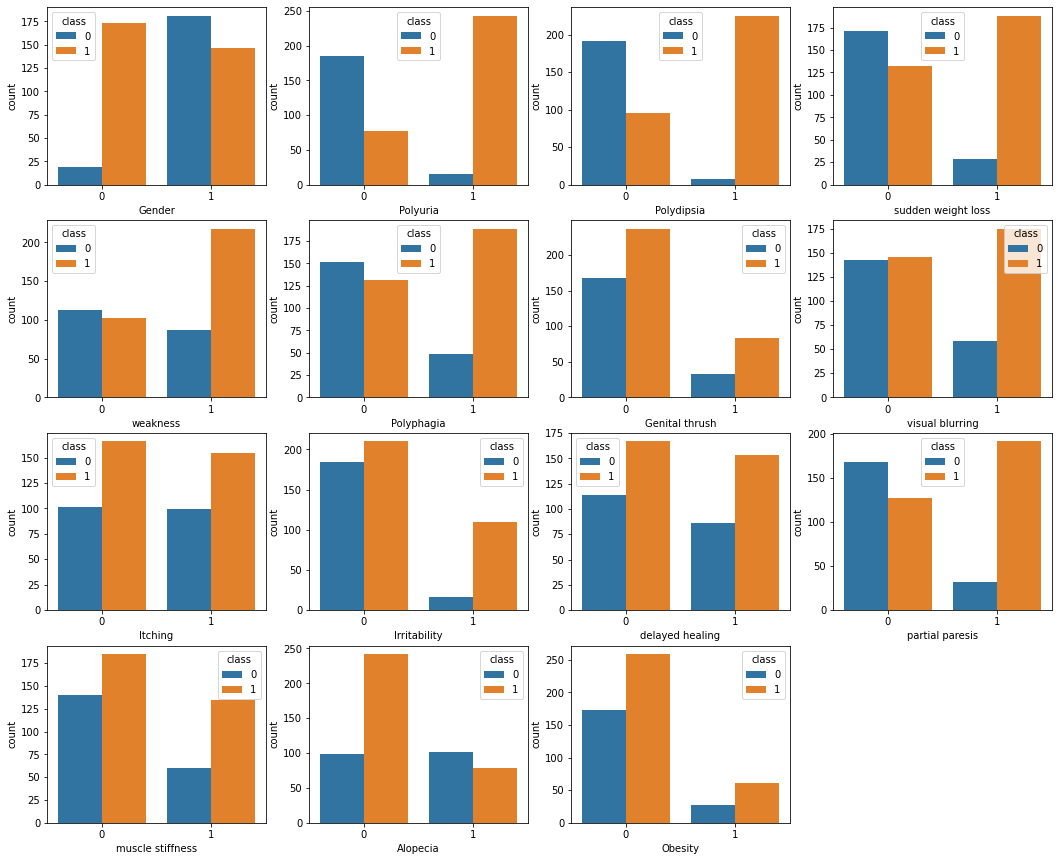

In [21]:
plt.figure(figsize=(18,15))
m=1
for i in data.columns[1:-1]:
    plt.subplot(4,4,m)
    m+=1
    sns.countplot(x=i,data=data,hue='class')
plt.savefig('Variables plot.png')

## Heatmap plot 

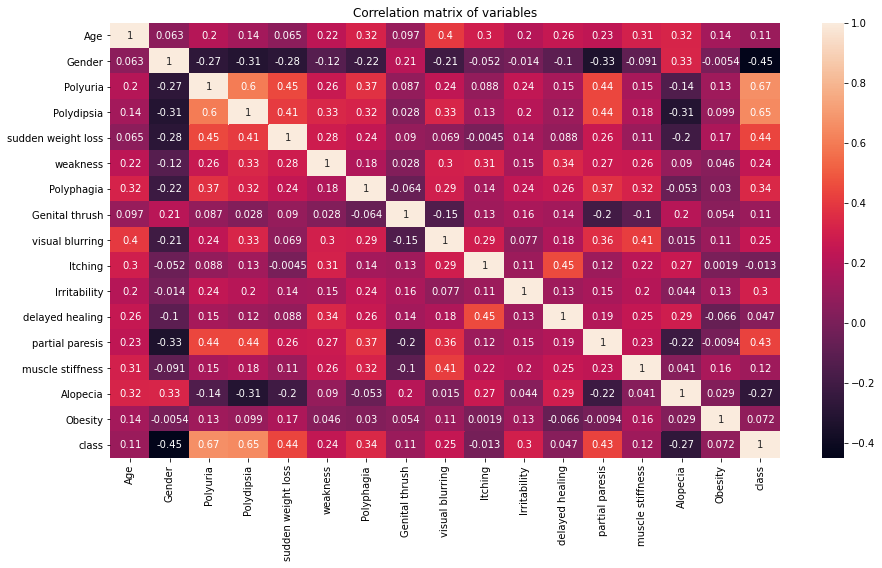

In [22]:
correlation_plot = data.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_plot,annot=True)
plt.title('Correlation matrix of variables') 
plt.savefig('Correlation plot.png')

## Data Split

We will split the data using the default train_test_split strategy to enusure that training and testing sets have the same distribution as the target variable

In [28]:
feature = data.drop(['class'], axis= 1)
label = data['class']
X_train, X_test, y_train, y_test = train_test_split(
feature, label, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(364, 16) (364,)
(156, 16) (156,)


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix

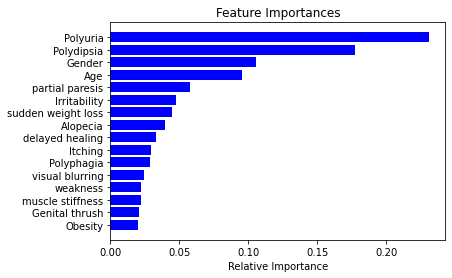

In [25]:
# plotting important features

from sklearn.ensemble import RandomForestClassifier

# fitting the model
model_RF = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model_RF.fit(X_train, y_train)

features = data.drop('class', axis=1).columns
importances = model_RF.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Building the classifiers

In [29]:
classifiers_description = {"model":[],"precision":[], "recall":[],"f1-score":[], "accuracy":[], "standard_deviation" :[]}

In [30]:
#This function has been adapted from : kaggle.com

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 

def model_accuracy(classifier = None, predictors=None, target= None, n_splits = 10):
    global classifiers_description

    
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    
    y_pred = cross_val_predict(classifier, predictors, target, cv=kf)
    scores = cross_val_score(classifier, predictors, target, cv=kf)
    
    # plotting confusion matrix

    cf_matrix = confusion_matrix(target, y_pred)
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='g', cmap='Blues')

    #making the classifier description report
    report = classification_report(target, y_pred, output_dict=True)
    classifier_name = type(classifier).__name__
    if classifier_name not in classifiers_description["model"]:
        classifiers_description["model"].append(classifier_name)
        classifiers_description["precision"].append(report['weighted avg']["precision"])
        classifiers_description["recall"].append(report['weighted avg']["recall"])
        classifiers_description["f1-score"].append(report['weighted avg']["f1-score"])
        classifiers_description["accuracy"].append(scores.mean())
        classifiers_description["standard_deviation"].append(scores.std())   

    
    print(classification_report(target, y_pred))

    return (scores.mean(), scores.std())

## Decision Tree

Text(0.5, 1.0, 'Decision tree confusion matrix - "gini"')

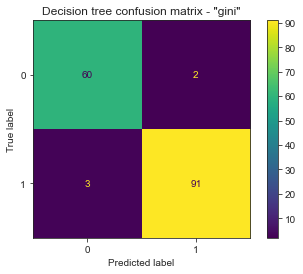

In [96]:
#entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
clf_DT = DecisionTreeClassifier(criterion='gini')
clf_DT.fit(X_train,y_train)
plot_confusion_matrix(clf_DT,X_test,y_test,cmap='viridis')
plt.title('Decision tree confusion matrix - "gini"')

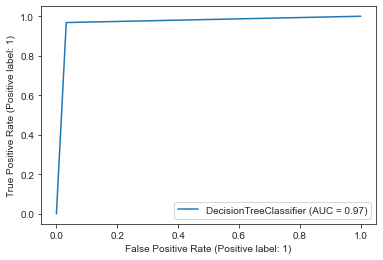

In [100]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_DT,X_test,y_test)

Text(0.5, 1.0, 'Decision tree confusion matrix - "entropy"')

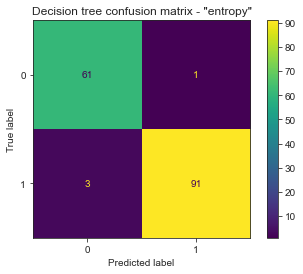

In [101]:
#entropy 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
clf_DT2 = DecisionTreeClassifier(criterion='entropy')
clf_DT2.fit(X_train,y_train)
plot_confusion_matrix(clf_DT2,X_test,y_test,cmap='viridis')
plt.title('Decision tree confusion matrix - "entropy"')

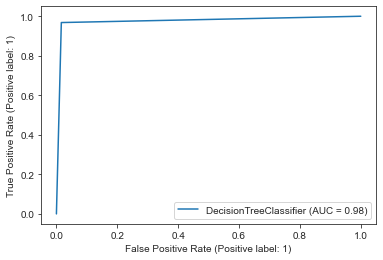

In [102]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_DT2,X_test,y_test)

[Text(697.5, 951.3000000000001, 'Polyuria <= 0.5\ngini = 0.471\nsamples = 364\nvalue = [138, 226]\nclass = yes'),
 Text(348.75, 679.5, 'Gender <= 0.5\ngini = 0.414\nsamples = 181\nvalue = [128, 53]\nclass = no'),
 Text(174.375, 407.70000000000005, 'Alopecia <= 0.5\ngini = 0.435\nsamples = 47\nvalue = [15, 32]\nclass = yes'),
 Text(87.1875, 135.89999999999998, 'gini = 0.208\nsamples = 34\nvalue = [4, 30]\nclass = yes'),
 Text(261.5625, 135.89999999999998, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = no'),
 Text(523.125, 407.70000000000005, 'Polydipsia <= 0.5\ngini = 0.264\nsamples = 134\nvalue = [113, 21]\nclass = no'),
 Text(435.9375, 135.89999999999998, 'gini = 0.129\nsamples = 115\nvalue = [107, 8]\nclass = no'),
 Text(610.3125, 135.89999999999998, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]\nclass = yes'),
 Text(1046.25, 679.5, 'Age <= 71.0\ngini = 0.103\nsamples = 183\nvalue = [10, 173]\nclass = yes'),
 Text(871.875, 407.70000000000005, 'Obesity <= 0.5\ngini = 0.056\nsampl

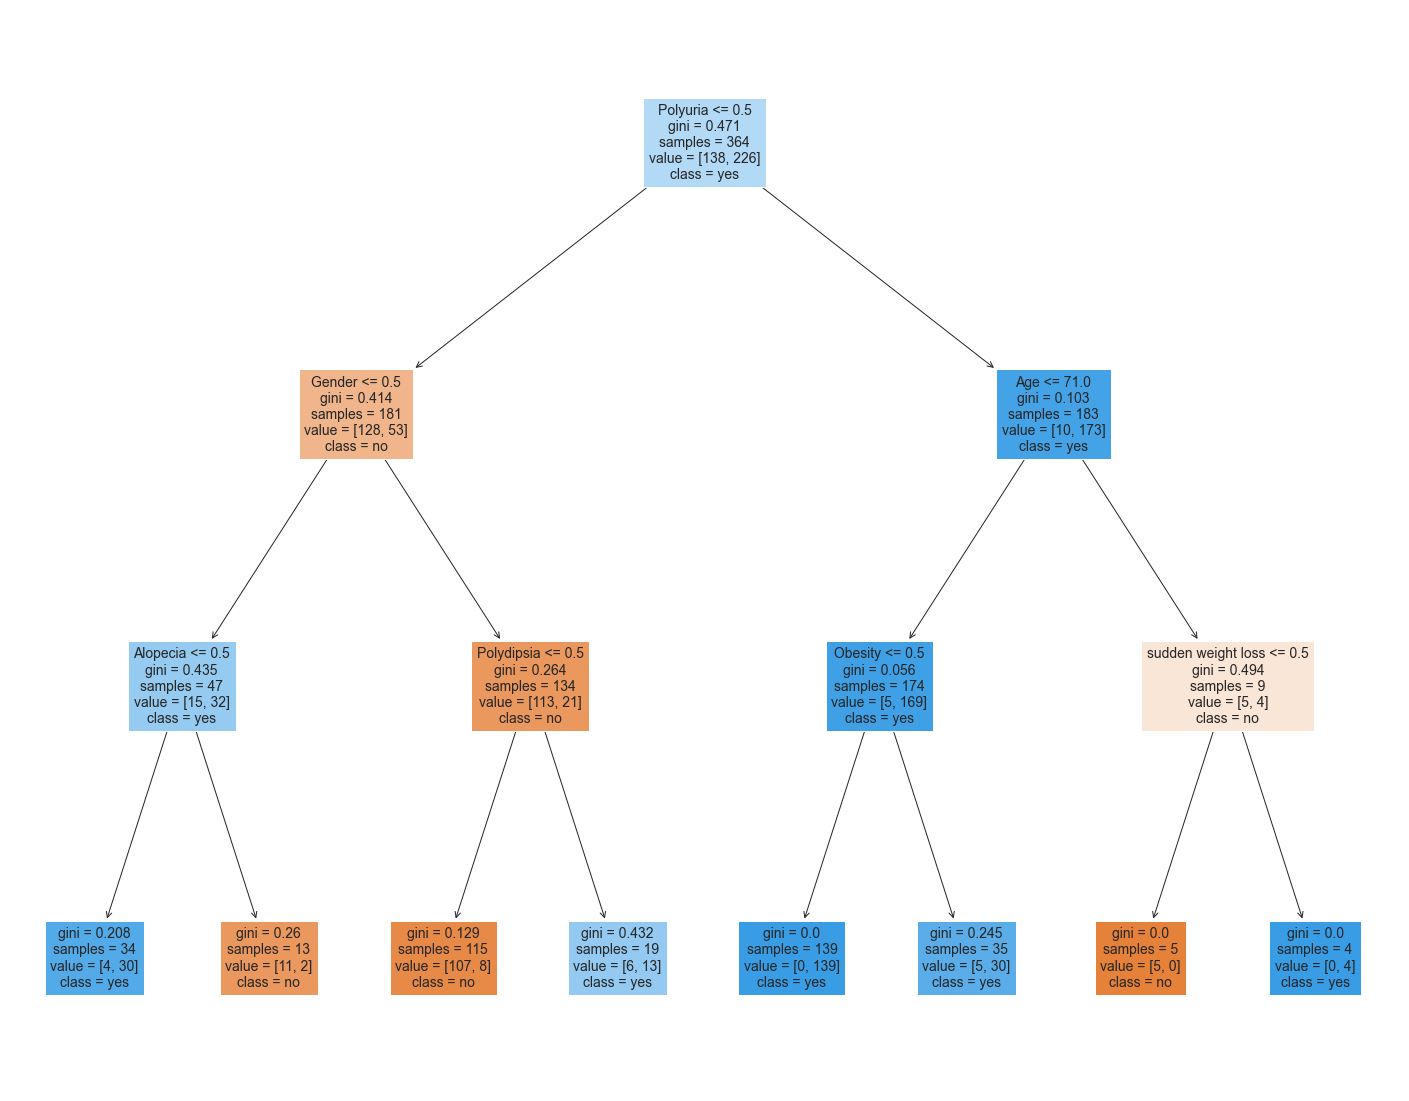

In [97]:
model = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=3, min_samples_leaf=2) 
model.fit(X_train,y_train)
#we experiment with the max_depth value and criterion
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=['Age','Gender','Polyuria','Polydipsia', 'sudden weight loss','weakness','Polyphagia',
                                   'Genital thrush',' visual blurring','Itching','Irritability','delayed healing',
                                    'partial paresis','muscle stiffness','Alopecia','Obesity'], 
               class_names=['no', 'yes'],filled=True)

## Logistic Regression

Text(0.5, 1.0, 'Logistic Regression confusion matrix')

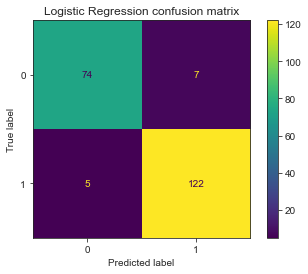

In [159]:
from sklearn.metrics import plot_confusion_matrix
clf_LR= LogisticRegression(max_iter=1000 )
clf_LR.fit(X_train,y_train)
plot_confusion_matrix(clf_LR,X_test,y_test,cmap='viridis')
# model_accuracy(classifier=clf_DT, predictors=X_train, target=y_train)
plt.title('Logistic Regression confusion matrix')

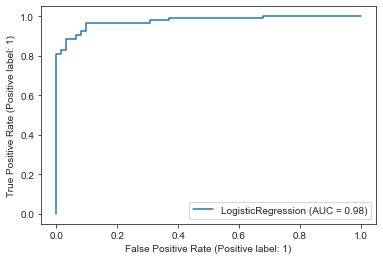

In [103]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_LR,X_test,y_test)

## Random Forest

Text(0.5, 1.0, 'Random Forest confusion matrix')

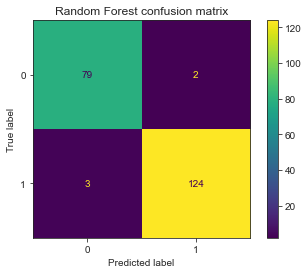

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train,y_train)
plot_confusion_matrix(clf_RF,X_test,y_test,cmap='viridis')
plt.title('Random Forest confusion matrix')

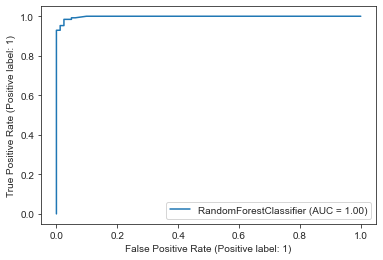

In [155]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_RF,X_test,y_test)

### Cross validate Random Forest

In [164]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split( feature,label, test_size=0.4, random_state=0)

X_train.shape, y_train.shape 
X_test.shape, y_test.shape
clf_RF = RandomForestClassifier().fit(X_train, y_train) 
clf_RF.score(X_test,y_test)

0.9711538461538461

In [163]:
from sklearn.model_selection import cross_val_score 
clf_RF = RandomForestClassifier()
scores = cross_val_score(clf_RF, X_train, y_train, cv=5)
scores

array([0.96825397, 1.        , 0.9516129 , 1.        , 0.98387097])

## SVM

Text(0.5, 1.0, 'SVM confusion matrix - "linear"')

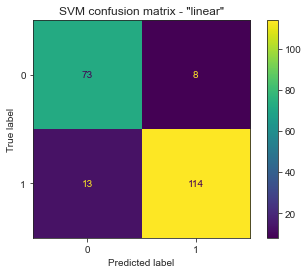

In [157]:
#Kernel - "linear"
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
clf_SVM = SVC(kernel="linear", degree=3)
clf_SVM .fit(X_train,y_train)
plot_confusion_matrix(clf_SVM,X_test,y_test,cmap='viridis')
plt.title('SVM confusion matrix - "linear"')

Text(0.5, 1.0, 'SVM confusion matrix - "rbf"')

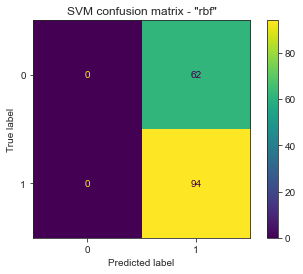

In [116]:
#Kernel - "rbf"
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
clf_SVM2 = SVC(kernel="rbf", degree=3)
clf_SVM2.fit(X_train,y_train)
plot_confusion_matrix(clf_SVM2,X_test,y_test,cmap='viridis')
plt.title('SVM confusion matrix - "rbf"')

Text(0.5, 1.0, 'SVM confusion matrix - "sigmoid"')

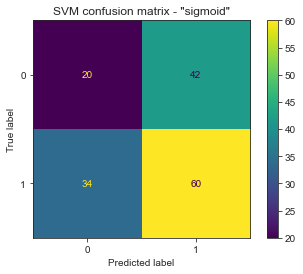

In [117]:
#Kernel - "sigmoid"
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
clf_SVM3= SVC(kernel="sigmoid", degree=3)
clf_SVM3.fit(X_train,y_train)
plot_confusion_matrix(clf_SVM3,X_test,y_test,cmap='viridis')
plt.title('SVM confusion matrix - "sigmoid"')

Text(0.5, 1.0, 'SVM confusion matrix - "poly"')

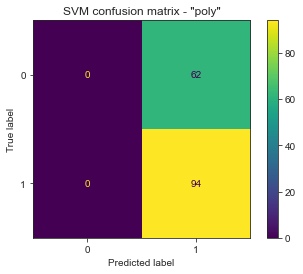

In [118]:
#kernel - "poly"
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
clf_SVM4 = SVC(kernel="poly", degree=3)
clf_SVM4.fit(X_train,y_train)
plot_confusion_matrix(clf_SVM4,X_test,y_test,cmap='viridis')
plt.title('SVM confusion matrix - "poly"')

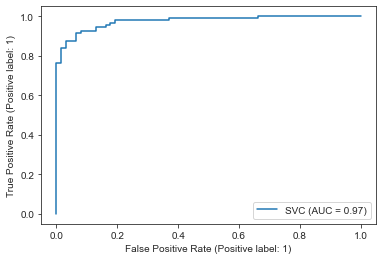

In [115]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_SVM,X_test,y_test)

### Cross Validation for SVM

In [144]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split( feature,label, test_size=0.4, random_state=0)

X_train.shape, y_train.shape 
X_test.shape, y_test.shape

clf = svm.SVC(kernel='linear', C=2).fit(X_train, y_train) 
clf.score(X_test, y_test)

0.8990384615384616

In [145]:
from sklearn.model_selection import cross_val_score 
clf = svm.SVC(kernel='linear', C=1, random_state=42) 
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.9047619 , 0.93650794, 0.90322581, 0.9516129 , 0.91935484])

### Testing overfitting

In [162]:
#checking for overfitting
from sklearn.model_selection import cross_validate
model = RandomForestClassifier(n_estimators=1000, random_state=1, criterion='entropy', bootstrap=True, oob_score=True, verbose=1)
cv_dict = cross_validate(model, X_train, y_train, return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

## Gradient Boosting

Text(0.5, 1.0, 'Gradient Boosting confusion matrix')

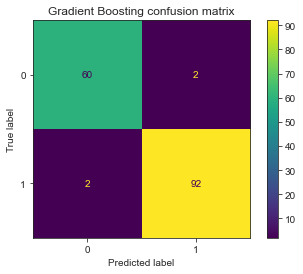

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
clf_GBC = GradientBoostingClassifier(learning_rate=0.1)
clf_GBC .fit(X_train,y_train)
plot_confusion_matrix(clf_GBC,X_test,y_test,cmap='viridis')
plt.title('Gradient Boosting confusion matrix')

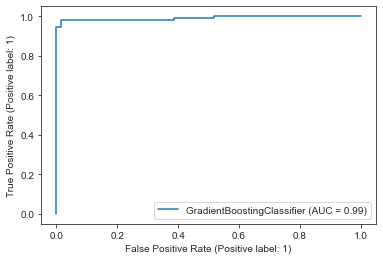

In [142]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_GBC,X_test,y_test)

## Neural Network

Text(0.5, 1.0, 'Neural Network confusion matrix')

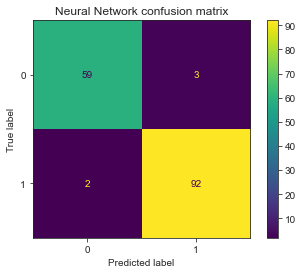

In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
MLP_clf = MLPClassifier(random_state=1, max_iter=10000)
MLP_clf.fit(X_train,y_train)
plot_confusion_matrix(MLP_clf,X_test,y_test,cmap='viridis')
plt.title('Neural Network confusion matrix')

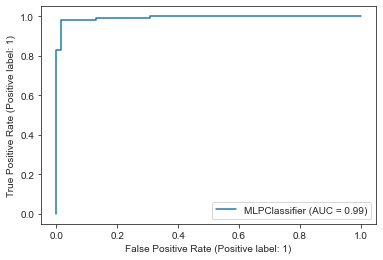

In [122]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(MLP_clf,X_test,y_test)

Text(0.5, 1.0, 'Neural Network confusion matrix - hidden layer')

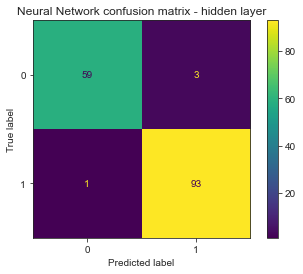

In [121]:
#With hidden layer
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
MLP_clf2 = MLPClassifier(random_state=1, hidden_layer_sizes=(400,100),max_iter=10000)
MLP_clf2.fit(X_train,y_train)
plot_confusion_matrix(MLP_clf2,X_test,y_test,cmap='viridis')
plt.title('Neural Network confusion matrix - hidden layer')

## Comparing classifiers 

In [160]:
classifier_df = pd.DataFrame.from_dict(classifiers_description)
classifier_df.sort_values(by=["f1-score","standard_deviation"], ascending=False)

,model,precision,recall,f1-score,accuracy,standard_deviation
2,RandomForestClassifier,0.978145,0.978022,0.978052,0.978078,0.020710
4,GradientBoostingClassifier,0.967454,0.967033,0.967121,0.966892,0.020850
5,MLPClassifier,0.964569,0.964286,0.964358,0.964414,0.030160
0,DecisionTreeClassifier,0.951474,0.950549,0.950743,0.942117,0.023315
1,LogisticRegression,0.928827,0.928571,0.928670,0.928679,0.024922
3,SVC,0.918744,0.917582,0.917905,0.917643,0.032254


### Implementing Feature Selection 

In [42]:
#Individual rankings:e.g. using first 5 features
#implemenet models again with new features    
    
feature2 = data.drop(['Genital thrush', 'Obesity', 'visual blurring','muscle stiffness','weakness','Polyphagia'], axis= 1)
label2 = data['class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(
feature2, label2, test_size=0.3, random_state=0)
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(364, 11) (364,)
(156, 11) (156,)


Text(0.5, 1.0, 'Random Forest confusion matrix - feature selection')

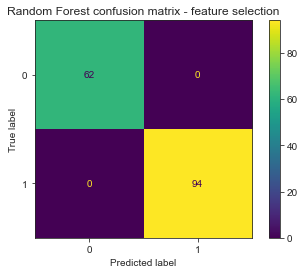

In [127]:
#Implementing Random forest with reduced features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train2,y_train2)
plot_confusion_matrix(clf_RF,X_test2,y_test2,cmap='viridis')
plt.title('Random Forest confusion matrix - feature selection')

## ROC Curves

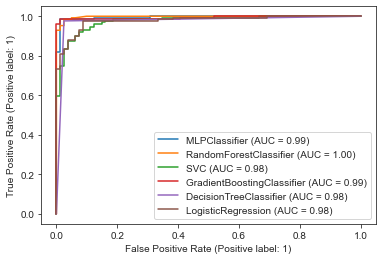

In [156]:
from sklearn.metrics import plot_roc_curve

classifiers = [MLP_clf, clf_RF, clf_SVM,clf_GBC,clf_DT,clf_LR]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)